<a href="https://colab.research.google.com/github/jg4726/public-file/blob/main/PCA%2C_SVD%2C_CUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4: K means and PCA

## Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Data Preprocessing

In this Colab, rather than downloading a file from Google Drive, we will load a famous machine learning dataset, the [Breast Cancer Wisconsin dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html), using the ```scikit-learn``` datasets loader.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
#Shape of data (X) and target (Y) values

breast_cancer = load_breast_cancer()
print(breast_cancer.target.shape)
print(breast_cancer.data.shape)
print(breast_cancer.feature_names)

(569,)
(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


For convenience, given that the dataset is small, we first construct a Pandas dataframe and a Numpy array:
*   ```features```, a dataframe of Dense vectors, containing all the original features in the dataset;
*   ```labels```, a series of binary labels indicating if the corresponding set of features belongs to a subject with breast cancer, or not.



In [ ]:
features = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
name = ['label']
labels = breast_cancer.target
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

# Task 1: K-means (25 points)

If you run successfully the Setup and Data Preprocessing stages, you are now ready to cluster the data with the [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) algorithm included sklearn.
Set the ```k``` parameter to **2**, fit the model, and the compute the [Silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering)) (i.e., a measure of quality of the obtained clustering).  

**IMPORTANT:** use sklearn implementation of the Silhouette score (via ```sklearn.metrics```).

In [ ]:
#YOUR CODE HERE

from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0).fit(features)
k_predict = kmeans.predict(features)

k_transformed = kmeans.transform(features)
s_score = silhouette_score(features, k_predict,metric='euclidean', sample_size=None, random_state=4)
print('Silhouette score is ', s_score)

Silhouette score is  0.6972646156059464


Take the predictions produced by K-means, and compare them with the ```labels``` variable (i.e., the ground truth from our dataset).  

For each cluster, compute how many data points in the dataset have been positive cases and negative cases. Based on this, use your judgement to determine which cluster should be assigned which label, and how many points have been labeled correctly.

**IMPORTANT**: K-means is a clustering algorithm, so it will not output a label for each data point, but just a cluster identifier!  As such, label ```0``` does not necessarily match the cluster identifier ```0```.


In [ ]:
#YOUR CODE HERE
result_group1 = np.where(k_predict == 1)[0].tolist()
result_group2 = np.where(k_predict == 0)[0].tolist()
group_1_labels = labels[result_group1]
group_2_labels = labels[result_group2]

pos_1 = np.sum(group_1_labels == 1)
neg_1 = np.sum(group_1_labels == 0)

pos_2 = np.sum(group_2_labels == 1)
neg_2 = np.sum(group_2_labels  == 0)

print('group1 positive is ', pos_1)
print('group1 negative is ', neg_1)
print('group2 positive is ', pos_2)
print('group2 negative is ', neg_2)

group1 positive is  1
group1 negative is  130
group2 positive is  356
group2 negative is  82


The Group 1 should be negative and group 2 should be positive

In [ ]:
print('total corrected labeled value', neg_1 + pos_2)

total corrected labeled value 486


# Task 2: PCA (10 points)

Now perform dimensionality reduction on the ```features``` using the [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) statistical procedure, available in sklearn.

Set the ```n``` parameter to **2**, effectively reducing the dataset size of a **15X** factor: from 30 features to just 2.

In [ ]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
pca_fit = PCA(n_components=2).fit(features)
data_pca = pca_fit.transform(features)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca

,PC1,PC2
0,1160.142574,-293.917544
1,1269.122443,15.630182
2,995.793889,39.156743
3,-407.180803,-67.380320
4,930.341180,189.340742
...,...,...
564,1414.126684,110.222492
565,1045.018854,77.057589
566,314.501756,47.553525
567,1124.858115,34.129225


Now run K-means with the same parameters as above, but on the ```pcaFeatures``` produced by the PCA reduction you just executed and compute the Silhouette score.

In [ ]:
# YOUR CODE HERE
kmeans_pca = KMeans(n_clusters=2, random_state=0).fit(data_pca)
k_predict_pca = kmeans_pca.predict(data_pca)
s_score_pca = silhouette_score(data_pca, k_predict_pca,metric='euclidean', sample_size=None, random_state=None)
print('Silhouette score of pca is',s_score_pca)

Silhouette score of pca is 0.6984195775999954


Use the 2 features generated from your PCA to visualize the clusters. Since we have used PCA to bring down th number of features to 2, they can be visualized in a x-y scatter plot. Also plot the centroids generated from the k-means on the same plot.
Make sure to give different colors to the two clusters based on their cluster labels generated by k-means.

HINT: Read the documentation for the scatter() function.

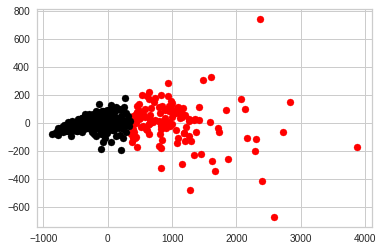

In [ ]:
# YOUR CODE HERE

filter1 = data_pca[k_predict_pca ==1]
filter0 = data_pca[k_predict_pca ==0]
plt.scatter(filter1.iloc[:,0],filter1.iloc[:,1], color = 'red')
plt.scatter(filter0.iloc[:,0],filter0.iloc[:,1], color = 'black')
plt.show()

# Task 3: SVD (10 points)

Perform all the tasks you did in Task 2, just instead of PCA, use sklearn to perform [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html), again with n = 2

Silhouette score of pca is 0.6984195775999954


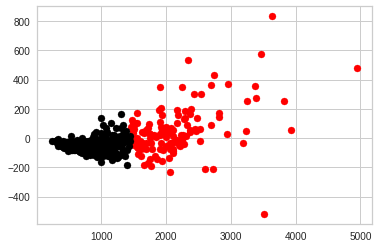

In [ ]:
# YOUR CODE HERE
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42).fit(features)
svd_transform = svd.transform(features)
data_svd = pd.DataFrame(svd_transform,columns=['svd1','svd2'])

kmeans_svd = KMeans(n_clusters=2, random_state=42).fit(data_svd)

k_predict_svd = kmeans_svd.predict(data_svd)
s_score_svd = silhouette_score(data_svd, k_predict_svd,metric='euclidean', sample_size=None, random_state=None)
print('Silhouette score of pca is',s_score_pca)


filter1_svd = data_svd[k_predict_svd ==1]
filter0_svd = data_svd[k_predict_svd ==0]
plt.scatter(filter1_svd.iloc[:,0],filter1_svd.iloc[:,1], color = 'red')
plt.scatter(filter0_svd.iloc[:,0],filter0_svd.iloc[:,1], color = 'black')
plt.show()

If you have done all the 3 tasks correctly, you should notice that the silhouette score for all 3 methods is almost the same. This is because we have restricted the number of clusters to two. And while there are binary labels, this dataset has 30 features, and breast cancer cases depend on a variable range of data, and hence splitting them into more clusters helps us learn more about the similarities in each cluster. 

Your last take focuses on that!

# Task 4: Comparative Analysis to Determine Best value of K (25 points)

For this entire section, use the original data before running any dimensionality reduction algorithms (features, labels).

Run k-means for ```k=2,3,4,5```, calculate the silhouette score and plot the data with the help of ```SilhouetteVisualizer``` from [yellowbricks](https://www.scikit-yb.org/en/latest/index.html). Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier. Under the hood, it’s using Matplotlib.

**HINT:** Read up about how the Silhouette plot should look, SilhouetteVisualizer is a very particular plot, which makes understanding the score and clusters intuitive.

The y-axis denotes the number of examples, and x-axis denotes the silhouette score for the various clusters with a line depiciting the average silhouette scores.

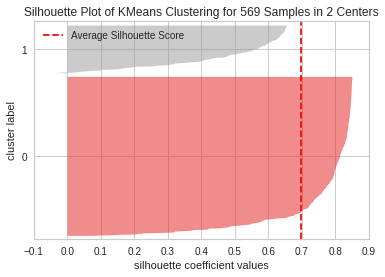

Silhouette score is  0.6972646156059464


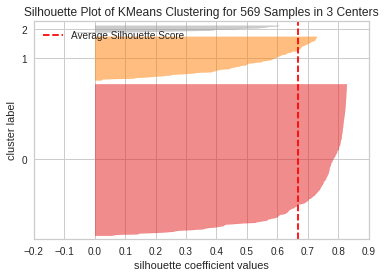

Silhouette score is  0.6695939093799408


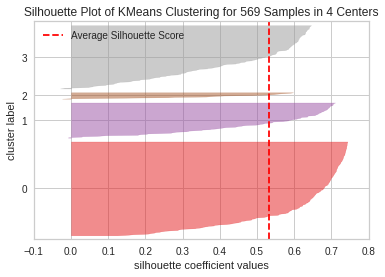

Silhouette score is  0.5334614737117133


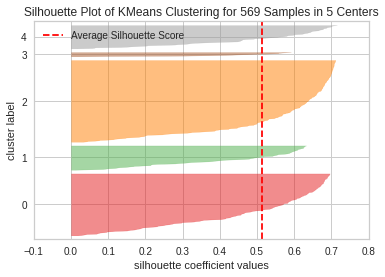

Silhouette score is  0.5120588504057625


In [ ]:
# YOUR CODE HERE
import warnings
from yellowbrick.cluster import silhouette_visualizer
warnings.filterwarnings('ignore')

k = [2,3,4,5]
# Use the quick method and immediately show the figure
for i in k:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans_fit = kmeans.fit(features)
  k_predict = kmeans_fit.predict(features)
  silhouette_visualizer(kmeans, features)
  s_score = silhouette_score(features, k_predict,metric='euclidean', sample_size=None, random_state=4)
  print('Silhouette score is ', s_score)

Based on your 4 plots, write how many number of clusters is optimal and why?

Make sure your answer is based on reasoning covering the following points:


*   Average silhouette score
*   Thickness of silhouette plots for various clusters
*   Fluctuations in size of the silhouette plots




**Answers:** number 4 is optimal because all clusters are above average Silhouette scores and less flutuation in sizes. The thickness are the most similar compared to other k values.

# Task 5: CUR Decomposition (30 points)

Implement CUR Decomposition for the ```features``` matrix. 


*   For matrix C and R use the Column Select Algorithm to choose the columns and rows for C and R respectively. 
*   For matrix U, find the intersection between the matrices C and R, and then find its pseudo-inverse using ```numpy.linalg.pinv```

Choose the rank to be 2. Hence the order of your matrices should be:


*   C: (569 X 2)
*   U: (2 X 2)
*   R: (2 X 30)





In [ ]:
from numpy.linalg import pinv as inv


def CUR(matrix, rank): 
    A_sq = matrix ** 2
    sum_A_sq = np.sum(A_sq)
    sum_A_sq_0 = np.sum(A_sq, axis=0)
    sum_A_sq_1 = np.sum(A_sq, axis=1)
    
    P_x_c = (sum_A_sq_0 / sum_A_sq).astype('float64')
    P_x_r = (sum_A_sq_1 / sum_A_sq).astype('float64')
    
    r, c = matrix.shape
    
    c_index = [np.random.choice(np.arange(0, c), p=P_x_c) for i in range(rank)]
    r_index = [np.random.choice(np.arange(0, r), p=P_x_r) for i in range(rank)]
    #print(c_index, r_index)
    C = matrix[:, c_index]
    R = matrix[r_index, :]
    W = C[r_index]
    
    U = np.linalg.pinv(W)
    return C, U, R


np_features = features.to_numpy()
C,U,R = CUR(np_features, 2)

print('C is {} and the shape is {}'.format(C, C.shape))
print('U is {} and the shape is {}'.format(U, U.shape))
print('R is {} and the shape is {}'.format(R, R.shape))

C is [[2019.  1001. ]
 [1956.  1326. ]
 [1709.  1203. ]
 ...
 [1124.   858.1]
 [1821.  1265. ]
 [ 268.6  181. ]] and the shape is (569, 2)
U is [[ 0.00129611 -0.00097139]
 [-0.0020682   0.00237854]] and the shape is (2, 2)
R is [[1.665e+01 2.138e+01 1.100e+02 9.046e+02 1.121e-01 1.457e-01 1.525e-01
  9.170e-02 1.995e-01 6.330e-02 8.068e-01 9.017e-01 5.455e+00 1.026e+02
  6.048e-03 1.882e-02 2.741e-02 1.130e-02 1.468e-02 2.801e-03 2.646e+01
  3.156e+01 1.770e+02 2.215e+03 1.805e-01 3.578e-01 4.695e-01 2.095e-01
  3.613e-01 9.564e-02]
 [1.955e+01 2.877e+01 1.336e+02 1.207e+03 9.260e-02 2.063e-01 1.784e-01
  1.144e-01 1.893e-01 6.232e-02 8.426e-01 1.199e+00 7.158e+00 1.064e+02
  6.356e-03 4.765e-02 3.863e-02 1.519e-02 1.936e-02 5.252e-03 2.505e+01
  3.627e+01 1.786e+02 1.926e+03 1.281e-01 5.329e-01 4.251e-01 1.941e-01
  2.818e-01 1.005e-01]] and the shape is (2, 30)
